In [5]:
import pandas as pd
import numpy as np
import random
import math
import pickle
import csv
import decimal
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None
from plotnine import *
from sklearn import preprocessing, manifold
from tqdm import tqdm


from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d
import ipywidgets as widgets
from IPython.display import display

## Data Import (Reformated data generated by unzip.Rmd) 

In [6]:
df = pd.read_csv ('./data/reformated_data.csv')
df = df.drop(df.columns[0], axis=1)

# dropping unknown dx = 0
df = df[df["dx"] > 0]

# putting dx = 3,4 into the Alz group
df.loc[df['dx'] == 3, 'dx'] = 2
df.loc[df['dx'] == 4, 'dx'] = 2

for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    

In [7]:
inserter = ['age', 'dx']

filter_b1 = inserter + [col for col in df if col.startswith('b1_')]
filter_b2 = inserter + [col for col in df if col.startswith('b2_')]
filter_b3 = inserter + [col for col in df if col.startswith('b3_')]
filter_b4 = inserter + [col for col in df if col.startswith('b4_')]
filter_b5 = inserter + [col for col in df if col.startswith('b5_')]
filter_b6 = inserter + [col for col in df if col.startswith('b6_')]
filter_b7 = inserter + [col for col in df if col.startswith('b7_')]
filter_b8 = inserter + [col for col in df if col.startswith('b8_')]
filter_b9 = inserter + [col for col in df if col.startswith('b9_')]
filter_b10 = inserter + [col for col in df if col.startswith('b10_')]

filter_b11 = inserter + [col for col in df if col.startswith('b11_')]
filter_b12 = inserter + [col for col in df if col.startswith('b12_')]
filter_b13 = inserter + [col for col in df if col.startswith('b13_')]
filter_b14 = inserter + [col for col in df if col.startswith('b14_')]
filter_b15 = inserter + [col for col in df if col.startswith('b15_')]
filter_b16 = inserter + [col for col in df if col.startswith('b16_')]
filter_b17 = inserter + [col for col in df if col.startswith('b17_')]
filter_b18 = inserter + [col for col in df if col.startswith('b18_')]
filter_b19 = inserter + [col for col in df if col.startswith('b19_')]
filter_b20 = inserter + [col for col in df if col.startswith('b20_')]

filter_b21 = inserter + [col for col in df if col.startswith('b21_')]
filter_b22 = inserter + [col for col in df if col.startswith('b22_')]
filter_b23 = inserter + [col for col in df if col.startswith('b23_')]
filter_b24 = inserter + [col for col in df if col.startswith('b24_')]
filter_b25 = inserter + [col for col in df if col.startswith('b25_')]
filter_b26 = inserter + [col for col in df if col.startswith('b26_')]
filter_b27 = inserter + [col for col in df if col.startswith('b27_')]
filter_b28 = inserter + [col for col in df if col.startswith('b28_')]
filter_b29 = inserter + [col for col in df if col.startswith('b29_')]
filter_b30 = inserter + [col for col in df if col.startswith('b30_')]

filter_b31 = inserter + [col for col in df if col.startswith('b31_')]
filter_b32 = inserter + [col for col in df if col.startswith('b32_')]
filter_b33 = inserter + [col for col in df if col.startswith('b33_')]
filter_b34 = inserter + [col for col in df if col.startswith('b34_')]
filter_b35 = inserter + [col for col in df if col.startswith('b35_')]
filter_b36 = inserter + [col for col in df if col.startswith('b36_')]
filter_b37 = inserter + [col for col in df if col.startswith('b37_')]
filter_b38 = inserter + [col for col in df if col.startswith('b38_')]
filter_b39 = inserter + [col for col in df if col.startswith('b39_')]
filter_b40 = inserter + [col for col in df if col.startswith('b40_')]

filter_b41 = inserter + [col for col in df if col.startswith('b41_')]
filter_b42 = inserter + [col for col in df if col.startswith('b42_')]
filter_b43 = inserter + [col for col in df if col.startswith('b43_')]
filter_b44 = inserter + [col for col in df if col.startswith('b44_')]
filter_b45 = inserter + [col for col in df if col.startswith('b45_')]
filter_b46 = inserter + [col for col in df if col.startswith('b46_')]
filter_b47 = inserter + [col for col in df if col.startswith('b47_')]
filter_b48 = inserter + [col for col in df if col.startswith('b48_')]
filter_b49 = inserter + [col for col in df if col.startswith('b49_')]

filter_b1 = df[filter_b1]
filter_b2 = df[filter_b2]
filter_b3 = df[filter_b3]
filter_b4 = df[filter_b4]
filter_b5 = df[filter_b5]
filter_b6 = df[filter_b6]
filter_b7 = df[filter_b7]
filter_b8 = df[filter_b8]
filter_b9 = df[filter_b9]
filter_b10 = df[filter_b10]

filter_b11 = df[filter_b11]
filter_b12 = df[filter_b12]
filter_b13 = df[filter_b13]
filter_b14 = df[filter_b14]
filter_b15 = df[filter_b15]
filter_b16 = df[filter_b16]
filter_b17 = df[filter_b17]
filter_b18 = df[filter_b18]
filter_b19 = df[filter_b19]
filter_b20 = df[filter_b20]

filter_b21 = df[filter_b21]
filter_b22 = df[filter_b22]
filter_b23 = df[filter_b23]
filter_b24 = df[filter_b24]
filter_b25 = df[filter_b25]
filter_b26 = df[filter_b26]
filter_b27 = df[filter_b27]
filter_b28 = df[filter_b28]
filter_b29 = df[filter_b29]
filter_b30 = df[filter_b30]

filter_b31 = df[filter_b31]
filter_b32 = df[filter_b32]
filter_b33 = df[filter_b33]
filter_b34 = df[filter_b34]
filter_b35 = df[filter_b35]
filter_b36 = df[filter_b36]
filter_b37 = df[filter_b37]
filter_b38 = df[filter_b38]
filter_b39 = df[filter_b39]
filter_b40 = df[filter_b40]

filter_b41 = df[filter_b41]
filter_b42 = df[filter_b42]
filter_b43 = df[filter_b43]
filter_b44 = df[filter_b44]
filter_b45 = df[filter_b45]
filter_b46 = df[filter_b46]
filter_b47 = df[filter_b47]
filter_b48 = df[filter_b48]
filter_b49 = df[filter_b49]

In [8]:
all_bundles = (filter_b1, filter_b2, filter_b3, filter_b4, filter_b5,
         filter_b6, filter_b7, filter_b8, filter_b9, filter_b10,
         filter_b11, filter_b12, filter_b13, filter_b14, filter_b15,
         filter_b16, filter_b17, filter_b18, filter_b19, filter_b20,
         filter_b21, filter_b22, filter_b23, filter_b24, filter_b25,
         filter_b26, filter_b27, filter_b28, filter_b29, filter_b30,
         filter_b31, filter_b32, filter_b33, filter_b34, filter_b35,
         filter_b36, filter_b37, filter_b38, filter_b39, filter_b40,
         filter_b41, filter_b42, filter_b43, filter_b44, filter_b45,
         filter_b46, filter_b47, filter_b48, filter_b49)

all_measures = list(set(list(filter_b1.columns)) - set(['age', 'dx']))

all_figs = [list(),list(),list()]

del (inserter, filter_b1, filter_b2, filter_b3, filter_b4, filter_b5, filter_b6, filter_b7, filter_b8, filter_b9, filter_b10,
filter_b11, filter_b12, filter_b13, filter_b14, filter_b15, filter_b16, filter_b17, filter_b18, filter_b19, filter_b20,
filter_b21, filter_b22, filter_b23, filter_b24, filter_b25, filter_b26, filter_b27, filter_b28, filter_b29, filter_b30,
filter_b31, filter_b32, filter_b33, filter_b34, filter_b35, filter_b36, filter_b37, filter_b38, filter_b39, filter_b40,
filter_b41, filter_b42, filter_b43, filter_b44, filter_b45, filter_b46, filter_b47, filter_b48, filter_b49)

## Absolute Difference Generation - (0-1) Normalization

In [5]:
scaler = MinMaxScaler() 
all_figs = [list(),list(),list()]
for bundle in all_bundles:
    for i in range(2,33):
        x3 = 0
        helper = bundle.columns[i]
        inputer = bundle[bundle[helper].notna()]
        x1 = inputer[inputer["dx"] == 1]["age"]
        x2 = inputer[inputer["dx"] == 2]["age"]
        minimum = (max(min(x1),min(x2)))
        maximum = (min(max(x1),max(x2)))
        copy = inputer.copy()
        copy2 = inputer.copy()
        copy = copy.loc[(copy["age"] >= minimum) & (copy["age"] <= maximum)]
        copy2[helper] = scaler.fit_transform(copy2[helper].values.reshape(-1,1))
        copy[helper] = scaler.fit_transform(copy[helper].values.reshape(-1,1))
        y1 = copy2[copy2["dx"] == 1][helper]
        y2 = copy2[copy2["dx"] == 2][helper]
        
        x1_short = copy[copy["dx"] == 1]["age"]
        x2_short = copy[copy["dx"] == 2]["age"]
        y1_short = copy[copy["dx"] == 1][helper]
        y2_short = copy[copy["dx"] == 2][helper]
        
        z1 = np.polyfit(x1_short, y1_short, 1)
        z2 = np.polyfit(x2_short, y2_short, 1)
        x3 = x1_short.append(x2_short)
        
        y_hat1 = np.poly1d(z1)(x1_short)
        y_hat2 = np.poly1d(z2)(x2_short)
        #plt.subplots
        #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
        #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
        temp_fig = plt.figure()
        plt.scatter(x1, y1, c = "lightblue", alpha = 0.5)
        plt.plot(x1_short, y_hat1, "b-", lw=2)
        plt.scatter(x2, y2, c = "darkred", alpha = 0.3)
        plt.plot(x2_short, y_hat2, "r-", lw=2)
        all_figs[0].append(temp_fig)
        all_figs[1].append(helper)
        # plt.savefig(helper+'_.png')
        plt.close(temp_fig)
        y_h_1 = np.poly1d(z1)(x3)
        y_h_2 = np.poly1d(z2)(x3)
        diff = sum(abs(y_h_1-y_h_2))/len(y_h_2)
        all_figs[2].append(diff)

# Save (0-1) Norm Output
# out = pd.DataFrame(all_figs)
# out.to_csv('./data/out.csv', index=False, header=False)


#### Ex. Output ((0-1) Normalization)

bundle_measure : b1_V31
abs diff (0-1) : 0.021


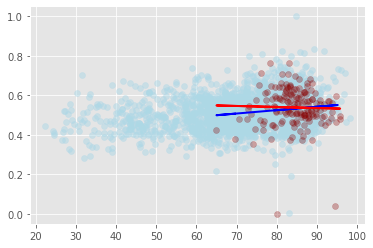

In [6]:
print("bundle_measure :", all_figs[1][30])
print("abs diff (0-1) :", round(all_figs[2][30],3))
all_figs[0][30]

## Absolute Difference Generation - Z Score Normalization

In [7]:
all_figs = [list(),list(),list()]
bundle_measures_std = [list()]
comb_df = list()
for bundle in all_bundles:
    for i in range(2,33):
        x3 = 0
        helper = bundle.columns[i]
        if (i == 2):
            comb_df = bundle.copy()
        inputer = bundle[bundle[helper].notna()]
        inputer[helper] = (inputer[helper] - inputer[helper].mean()) / inputer[helper].std()
        comb_df[helper] = inputer[helper]
        if (i == 32):
            bundle_measures_std[0].append(comb_df)
        x1 = inputer[inputer["dx"] == 1]["age"]
        x2 = inputer[inputer["dx"] == 2]["age"]
        minimum = (max(min(x1),min(x2)))
        maximum = (min(max(x1),max(x2)))
        copy = inputer.copy()
        copy2 = inputer.copy()
        copy = copy.loc[(copy["age"] >= minimum) & (copy["age"] <= maximum)]
        #copy2[helper] = scaler.fit_transform(copy2[helper].values.reshape(-1,1))
        #copy[helper] = scaler.fit_transform(copy[helper].values.reshape(-1,1))
        y1 = copy2[copy2["dx"] == 1][helper]
        y2 = copy2[copy2["dx"] == 2][helper]
        
        x1_short = copy[copy["dx"] == 1]["age"]
        x2_short = copy[copy["dx"] == 2]["age"]
        y1_short = copy[copy["dx"] == 1][helper]
        y2_short = copy[copy["dx"] == 2][helper]
        
        z1 = np.polyfit(x1_short, y1_short, 1)
        z2 = np.polyfit(x2_short, y2_short, 1)
        x3 = x1_short.append(x2_short)
        
        y_hat1 = np.poly1d(z1)(x1_short)
        y_hat2 = np.poly1d(z2)(x2_short)
        #plt.subplots
        #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
        #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
        temp_fig = plt.figure()
        plt.scatter(x1, y1, c = "lightblue", alpha = 0.5)
        plt.plot(x1_short, y_hat1, "b-", lw=2)
        plt.scatter(x2, y2, c = "darkred", alpha = 0.3)
        plt.plot(x2_short, y_hat2, "r-", lw=2)
        all_figs[0].append(temp_fig)
        all_figs[1].append(helper)
        # plt.savefig(helper+'_.png')
        plt.close(temp_fig)
        y_h_1 = np.poly1d(z1)(x3)
        y_h_2 = np.poly1d(z2)(x3)
        diff = sum(abs(y_h_1-y_h_2))/len(y_h_2)
        all_figs[2].append(diff)

# Save Z-Score Norm Output
# out = pd.DataFrame(all_figs)
# out.to_csv('./data/out_std.csv', index=False, header=False)

In [8]:
std_data = pd.concat([bundle_measures_std[0][0],bundle_measures_std[0][1],bundle_measures_std[0][2],
          bundle_measures_std[0][3],bundle_measures_std[0][4],bundle_measures_std[0][5],
          bundle_measures_std[0][6],bundle_measures_std[0][7],bundle_measures_std[0][8],
          bundle_measures_std[0][9],bundle_measures_std[0][10],bundle_measures_std[0][11],
          bundle_measures_std[0][12],bundle_measures_std[0][13],bundle_measures_std[0][14],
          bundle_measures_std[0][15],bundle_measures_std[0][16],bundle_measures_std[0][17],
          bundle_measures_std[0][18],bundle_measures_std[0][19],bundle_measures_std[0][20],
          bundle_measures_std[0][21],bundle_measures_std[0][22],bundle_measures_std[0][23],
          bundle_measures_std[0][24],bundle_measures_std[0][25],bundle_measures_std[0][26],
          bundle_measures_std[0][27],bundle_measures_std[0][28],bundle_measures_std[0][29],
          bundle_measures_std[0][30],bundle_measures_std[0][31],bundle_measures_std[0][32],
          bundle_measures_std[0][33],bundle_measures_std[0][34],bundle_measures_std[0][35],
          bundle_measures_std[0][36],bundle_measures_std[0][37],bundle_measures_std[0][38],
          bundle_measures_std[0][39],bundle_measures_std[0][40],bundle_measures_std[0][41],
          bundle_measures_std[0][42],bundle_measures_std[0][43],bundle_measures_std[0][44],
          bundle_measures_std[0][45],bundle_measures_std[0][46],bundle_measures_std[0][47],
          bundle_measures_std[0][48]], axis =1)
# std_data.to_csv('./data/standardized_data.csv', index=False)

#### Ex. Outputs (Z Score Normalization)

bundle_measure  : b1_V25
abs diff z-norm : 0.429


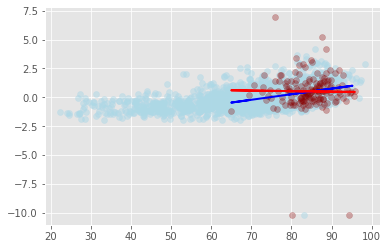

In [9]:
print("bundle_measure  :", all_figs[1][24])
print("abs diff z-norm :", round(all_figs[2][24],3))
all_figs[0][24]

bundle_measure  : b1_V27
abs diff z-norm : 0.229


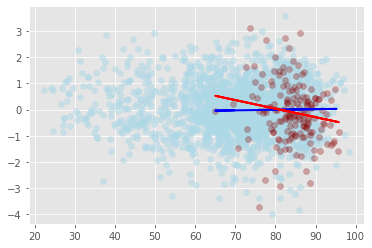

In [10]:
print("bundle_measure  :", all_figs[1][26])
print("abs diff z-norm :", round(all_figs[2][6],3))
all_figs[0][6]

In [11]:
bundle_measures_std[0][1].head()

,age,dx,b2_V1,b2_V2,b2_V3,b2_V4,b2_V5,b2_V6,b2_V7,b2_V8,...,b2_V22,b2_V23,b2_V24,b2_V25,b2_V26,b2_V27,b2_V28,b2_V29,b2_V30,b2_V31
0,79.5,1,1.671501,1.917807,0.927194,0.031454,-0.402146,1.417152,2.287906,1.584899,...,-0.115172,0.203955,0.371417,0.101983,NaN,-2.311281,-2.320539,-2.319666,-2.318231,-2.311694
1,81.4,1,1.324258,1.859803,0.803029,0.127772,-0.282034,0.821649,1.292742,1.447500,...,-0.426061,0.558054,0.720688,0.440879,0.411852,-1.481682,-1.490339,-1.486410,-1.484415,-1.481640
2,83.5,1,0.402136,2.411246,0.857622,0.384295,-0.248049,0.848965,1.469193,1.068019,...,-0.617551,0.913906,1.010182,0.809275,0.361229,-1.512729,-1.517409,-1.514000,-1.510567,-1.503027
3,84.5,1,0.749379,1.801899,0.044975,0.977543,-0.311202,0.930352,1.447442,1.120623,...,-0.797318,1.134432,1.157277,1.058395,0.308644,-0.758083,-0.761266,-0.755986,-0.752582,-0.743334
4,85.4,1,1.407952,2.480792,0.055150,1.394669,-0.273751,0.979417,1.699899,0.612381,...,-0.955304,1.216888,1.202078,1.152156,0.089840,-0.593588,-0.600379,-0.596472,-0.592773,-0.584638


# Standardized (Z-Score) Component Dim Red - (feat based)

In [28]:
pca = PCA(n_components = 1)
tsne = manifold.TSNE(n_components=1, init='pca', random_state=726, n_iter = 1500)

comp_dim_red = [list(),list(),list(),list(),list()]
comp_dim_red_ts = [list(),list(),list(),list(),list()]

pca_expl = [list(),list(),list(),list(),list()]
tsne_expl = [list(),list(),list(),list(),list()]

for i in tqdm(range(0,49)): # start 1 and end 31 # 0,49
    label_desc = "b_" + np.str(i+1) + "_describe"
    label_lgth = "b_" + np.str(i+1) + "_length"
    label_volm = "b_" + np.str(i+1) + "_volumn"
    label_sfar = "b_" + np.str(i+1) + "_surfarea"
    label_imag = "b_" + np.str(i+1) + "_imagfeat"
    
    df_impute = (bundle_measures_std[0][i]).copy()
    df_impute = df_impute.loc[(df_impute["age"] >= 64.9) & (df_impute["age"] <= 95.9)]
    tester = df_impute.fillna(df_impute.mean())
    
    test_outs = tester.iloc[:, [0,1]]
    test_desc = tester.iloc[:, [2,5,6,14,17,20]]
    test_lgth = tester.iloc[:, [3,4,7,12,19,16]]
    test_volm = tester.iloc[:, [8,9,10]]
    test_sfar = tester.iloc[:, [11,13,18,15]]
    test_imag = tester.iloc[:, 21:33]
    
    principleComponents_desc = pca.fit_transform(test_desc)
    pca_expl[0].append(float(pca.explained_variance_ratio_))
    principleComponents_lgth = pca.fit_transform(test_lgth)
    pca_expl[1].append(float(pca.explained_variance_ratio_))
    principleComponents_volm = pca.fit_transform(test_volm)
    pca_expl[2].append(float(pca.explained_variance_ratio_))
    principleComponents_sfar = pca.fit_transform(test_sfar)
    pca_expl[3].append(float(pca.explained_variance_ratio_))
    principleComponents_imag = pca.fit_transform(test_imag)
    pca_expl[4].append(float(pca.explained_variance_ratio_))

    principleDF_desc = pd.DataFrame(data = principleComponents_desc, columns = [label_desc])
    principleDF_lgth = pd.DataFrame(data = principleComponents_lgth, columns = [label_lgth])
    principleDF_volm = pd.DataFrame(data = principleComponents_volm, columns = [label_volm])
    principleDF_sfar = pd.DataFrame(data = principleComponents_sfar, columns = [label_sfar])
    principleDF_imag = pd.DataFrame(data = principleComponents_imag, columns = [label_imag])
      
    comp_dim_red[0].append(principleDF_desc)
    comp_dim_red[1].append(principleDF_lgth)
    comp_dim_red[2].append(principleDF_volm)
    comp_dim_red[3].append(principleDF_sfar)
    comp_dim_red[4].append(principleDF_imag)
    
    tsneComponents_desc = tsne.fit_transform(test_desc)
    tsne_expl[0].append(tsne.kl_divergence_)
    tsneComponents_lgth = tsne.fit_transform(test_lgth)
    tsne_expl[1].append(tsne.kl_divergence_)
    tsneComponents_volm = tsne.fit_transform(test_volm)
    tsne_expl[2].append(tsne.kl_divergence_)
    tsneComponents_sfar = tsne.fit_transform(test_sfar)
    tsne_expl[3].append(tsne.kl_divergence_)
    tsneComponents_imag = tsne.fit_transform(test_imag)
    tsne_expl[4].append(tsne.kl_divergence_)
    
    tsneDF_desc = pd.DataFrame(data = tsneComponents_desc, columns = [label_desc])
    tsneDF_lgth = pd.DataFrame(data = tsneComponents_lgth, columns = [label_lgth])
    tsneDF_volm = pd.DataFrame(data = tsneComponents_volm, columns = [label_volm])
    tsneDF_sfar = pd.DataFrame(data = tsneComponents_sfar, columns = [label_sfar])
    tsneDF_imag = pd.DataFrame(data = tsneComponents_imag, columns = [label_imag])
    
    comp_dim_red_ts[0].append(tsneDF_desc)
    comp_dim_red_ts[1].append(tsneDF_lgth)
    comp_dim_red_ts[2].append(tsneDF_volm)
    comp_dim_red_ts[3].append(tsneDF_sfar)
    comp_dim_red_ts[4].append(tsneDF_imag)
    

100%|██████████| 49/49 [47:55<00:00, 58.68s/it]


In [40]:
pca_expl_df = pd.DataFrame(pca_expl).T.rename(columns={0:"shape_pca",1:"length_pca",2:"volumn_pca",
                                      3:"surface_area_pca", 4:"microstructure_pca"})
tsne_expl_df = pd.DataFrame(tsne_expl).T.rename(columns={0:"shape_tsne",1:"length_tsne",2:"volumn_tsne",
                                      3:"surface_area_tsne", 4:"microstructure_tsne"})
pca_expl_df

,shape_pca,length_pca,volumn_pca,surface_area_pca,microstructure_pca
0,0.540668,0.493155,0.597534,0.769693,0.512866
1,0.403934,0.538050,0.642889,0.833895,0.507130
2,0.397803,0.457409,0.707515,0.820237,0.458321
3,0.378909,0.413553,0.637460,0.789421,0.449615
4,0.349209,0.496862,0.603678,0.794482,0.495391
5,0.338793,0.509994,0.656282,0.796841,0.496423
6,0.381114,0.533666,0.623371,0.811857,0.473922
7,0.347071,0.536274,0.616685,0.818622,0.508319
8,0.452871,0.531558,0.682770,0.826823,0.488438
9,0.419002,0.526995,0.623514,0.813281,0.484009


In [46]:
comb_comp_dim_red = []
comb_comp_dim_red_ts = []
dim_red_eval = []

pca_expl_df = pd.DataFrame(pca_expl).T.rename(columns={0:"shape_pca",1:"length_pca",2:"volumn_pca",
                                      3:"surface_area_pca", 4:"microstructure_pca"})
tsne_expl_df = pd.DataFrame(tsne_expl).T.rename(columns={0:"shape_tsne",1:"length_tsne",2:"volumn_tsne",
                                      3:"surface_area_tsne", 4:"microstructure_tsne"})

for i in range(0,5):
    comb_comp_dim_red.append(pd.concat([comp_dim_red[i][0],comp_dim_red[i][1],comp_dim_red[i][2],comp_dim_red[i][3],
              comp_dim_red[i][4],comp_dim_red[i][5],comp_dim_red[i][6],comp_dim_red[i][7],
              comp_dim_red[i][8],comp_dim_red[i][9],comp_dim_red[i][10],comp_dim_red[i][11],
              comp_dim_red[i][12],comp_dim_red[i][13],comp_dim_red[i][14],comp_dim_red[i][15],
              comp_dim_red[i][16],comp_dim_red[i][17],comp_dim_red[i][18],comp_dim_red[i][19],
              comp_dim_red[i][20],comp_dim_red[i][21],comp_dim_red[i][22],comp_dim_red[i][23],
              comp_dim_red[i][24],comp_dim_red[i][25],comp_dim_red[i][26],comp_dim_red[i][27],
              comp_dim_red[i][28],comp_dim_red[i][29],comp_dim_red[i][30],comp_dim_red[i][31],
              comp_dim_red[i][32],comp_dim_red[i][33],comp_dim_red[i][34],comp_dim_red[i][35],
              comp_dim_red[i][36],comp_dim_red[i][37],comp_dim_red[i][38],comp_dim_red[i][39],
              comp_dim_red[i][40],comp_dim_red[i][41],comp_dim_red[i][42],comp_dim_red[i][43],
              comp_dim_red[i][44],comp_dim_red[i][45],comp_dim_red[i][46],comp_dim_red[i][47],
              comp_dim_red[i][48]], axis = 1))
    
    comb_comp_dim_red_ts.append(pd.concat([comp_dim_red_ts[i][0],comp_dim_red_ts[i][1],comp_dim_red_ts[i][2],comp_dim_red_ts[i][3],
              comp_dim_red_ts[i][4],comp_dim_red_ts[i][5],comp_dim_red_ts[i][6],comp_dim_red_ts[i][7],
              comp_dim_red_ts[i][8],comp_dim_red_ts[i][9],comp_dim_red_ts[i][10],comp_dim_red_ts[i][11],
              comp_dim_red_ts[i][12],comp_dim_red_ts[i][13],comp_dim_red_ts[i][14],comp_dim_red_ts[i][15],
              comp_dim_red_ts[i][16],comp_dim_red_ts[i][17],comp_dim_red_ts[i][18],comp_dim_red_ts[i][19],
              comp_dim_red_ts[i][20],comp_dim_red_ts[i][21],comp_dim_red_ts[i][22],comp_dim_red_ts[i][23],
              comp_dim_red_ts[i][24],comp_dim_red_ts[i][25],comp_dim_red_ts[i][26],comp_dim_red_ts[i][27],
              comp_dim_red_ts[i][28],comp_dim_red_ts[i][29],comp_dim_red_ts[i][30],comp_dim_red_ts[i][31],
              comp_dim_red_ts[i][32],comp_dim_red_ts[i][33],comp_dim_red_ts[i][34],comp_dim_red_ts[i][35],
              comp_dim_red_ts[i][36],comp_dim_red_ts[i][37],comp_dim_red_ts[i][38],comp_dim_red_ts[i][39],
              comp_dim_red_ts[i][40],comp_dim_red_ts[i][41],comp_dim_red_ts[i][42],comp_dim_red_ts[i][43],
              comp_dim_red_ts[i][44],comp_dim_red_ts[i][45],comp_dim_red_ts[i][46],comp_dim_red_ts[i][47],
              comp_dim_red_ts[i][48]], axis = 1))

comp_dim_out = pd.concat([test_outs.reset_index(), comb_comp_dim_red[0], comb_comp_dim_red[1],
                         comb_comp_dim_red[2], comb_comp_dim_red[3],
                         comb_comp_dim_red[4]], axis =1).drop(["index"], axis=1)

comp_dim_out_ts = pd.concat([test_outs.reset_index(), comb_comp_dim_red_ts[0], comb_comp_dim_red_ts[1],
                         comb_comp_dim_red_ts[2], comb_comp_dim_red_ts[3],
                         comb_comp_dim_red_ts[4]], axis =1).drop(["index"], axis=1)

dim_red_eval = pd.concat((pca_expl_df,tsne_expl_df),axis=1)

comp_dim_out.to_csv('./data/component_std_data.csv', index=False)
comp_dim_out_ts.to_csv('./data/component_tsne_data.csv', index=False)
dim_red_eval.to_csv('./data/dim_red_evaluation.csv', index=False)

# Bundlewise Dim. Reduction - (PCA)

In [75]:
pca = PCA(n_components = 2)
all_pca_bundles = [list(),list()]
for i in range(0,49):
    label = "b_" + np.str(i+1)
    all_pca_bundles[0].append(label)
    
    tester = (bundle_measures_std[0][i]).copy().dropna()
    minimum = (max(min(tester[tester["dx"] == 1]["age"]),min(tester[tester["dx"] == 2]["age"])))
    maximum = (min(max(tester[tester["dx"] == 1]["age"]),max(tester[tester["dx"] == 2]["age"])))
    tester = tester.loc[(tester["age"] >= minimum) & (tester["age"] <= maximum)]
    
    test_y = pd.DataFrame(tester.loc[:,['dx', 'age']].values, columns = ['dx', 'age'])
    test_x = tester.drop(['age','dx'], axis = 1)
    principleComponents = pca.fit_transform(test_x)
    principleDF = pd.DataFrame(data = principleComponents, columns = ['pc1','pc2'])
    final_df = pd.concat([test_y,principleDF], axis = 1)
    all_pca_bundles[1].append(final_df)

# Save PCA Output
#out = pd.DataFrame(all_pca_bundles)
#out.to_csv('./data/out_pca.csv', index=False, header=False)

#### Ex. Outputs (Bundlewise PCA)

In [ ]:
print("bundle :", all_pca_bundles[0][0])
print(all_pca_bundles[1][0])

#### Ex. Output (3D Scatter Plot)

<IPython.core.display.Javascript object>


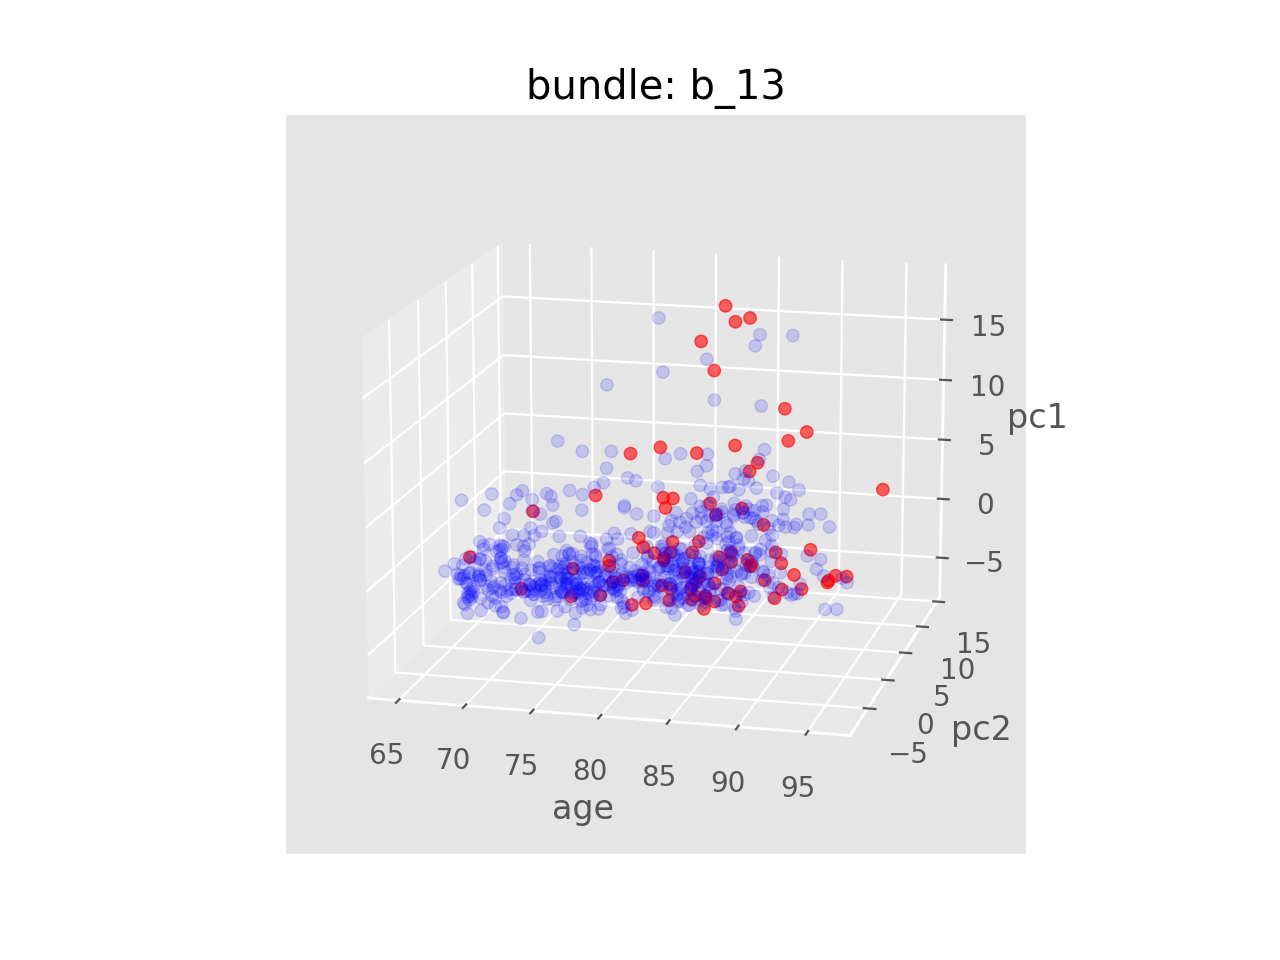

In [17]:
b_of_interest = 13

boi_data = all_pca_bundles[1][b_of_interest-1]
boi_name = all_pca_bundles[0][b_of_interest-1]
boi_alz = boi_data[boi_data["dx"] == 2.0]
boi_non = boi_data[boi_data["dx"] == 1.0]

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(boi_alz['age'], boi_alz['pc2'], boi_alz['pc1'], c='r', marker='o', alpha = 0.6)
ax.scatter(boi_non['age'], boi_non['pc2'], boi_non['pc1'], c='b', marker='o', alpha = 0.15)

ax.set_xlabel('age')
ax.set_ylabel('pc2')
ax.set_zlabel('pc1')
ax.set_title(("bundle: "+boi_name))

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(20, angle)
    plt.draw()
    plt.pause(.001)

## Bundlewise Dim. Reduction - (PCA : 1 Dim)

In [89]:
plt.close(fig)
pca = PCA(n_components = 1)
all_pca_bundles_single = [list(),list(),list(),list()]
for i in range(0,49):
    label = "b_" + np.str(i+1)
    all_pca_bundles_single[0].append(label)
    
    tester = (bundle_measures_std[0][i]).copy().dropna()
    minimum = (max(min(tester[tester["dx"] == 1]["age"]),min(tester[tester["dx"] == 2]["age"])))
    maximum = (min(max(tester[tester["dx"] == 1]["age"]),max(tester[tester["dx"] == 2]["age"])))
    tester = tester.loc[(tester["age"] >= minimum) & (tester["age"] <= maximum)]
    
    test_y = pd.DataFrame(tester.loc[:,['dx', 'age']].values, columns = ['dx', 'age'])
    test_x = tester.drop(['age','dx'], axis = 1)
    principleComponents = pca.fit_transform(test_x)
    principleDF = pd.DataFrame(data = principleComponents, columns = ['pc'])
    final_df = pd.concat([test_y,principleDF], axis = 1)
    all_pca_bundles_single[1].append(final_df)
    
# Save PCA Output
#out = pd.DataFrame(all_pca_bundles)
#out.to_csv('./data/out_pca.csv', index=False, header=False)

NameError: name 'fig' is not defined

In [77]:
for i in range(0,49):
    boi_data = all_pca_bundles_single[1][i]
    boi_name = all_pca_bundles_single[0][i]
    boi_alz = boi_data[boi_data["dx"] == 2.0]
    boi_non = boi_data[boi_data["dx"] == 1.0]

    z1 = np.polyfit(boi_non["age"], boi_non["pc"], 1)
    z2 = np.polyfit(boi_alz["age"], boi_alz["pc"], 1)
    x3 = boi_alz["age"].append(boi_non["age"])

    y_hat1 = np.poly1d(z1)(boi_non["age"])
    y_hat2 = np.poly1d(z2)(boi_alz["age"])

    y_hat_1 = np.poly1d(z1)(x3)
    y_hat_2 = np.poly1d(z2)(x3)
    diff = sum(abs(y_hat_1-y_hat_2))/len(y_hat_2)

    temp_fig = plt.figure()
    plt.scatter(boi_non["age"], boi_non["pc"], c = "lightblue", alpha = 0.5)
    plt.plot(boi_non["age"], y_hat1, "b-", lw=2)
    plt.scatter(boi_alz["age"], boi_alz["pc"], c = "darkred", alpha = 0.3)
    plt.plot(boi_alz["age"], y_hat2, "r-", lw=2)
    
    all_pca_bundles_single[2].append(temp_fig)
    all_pca_bundles_single[3].append(diff)
    
    plt.close(temp_fig)
    
# Save PCA Output
#out = pd.DataFrame(all_pca_bundles_single)
#out.to_csv('./data/out_pca_single.csv', index=False, header=False)

NameError: name 'all_pca_bundles_single' is not defined

Bundle   : b_13
Abs Diff : 1.38


<IPython.core.display.Javascript object>


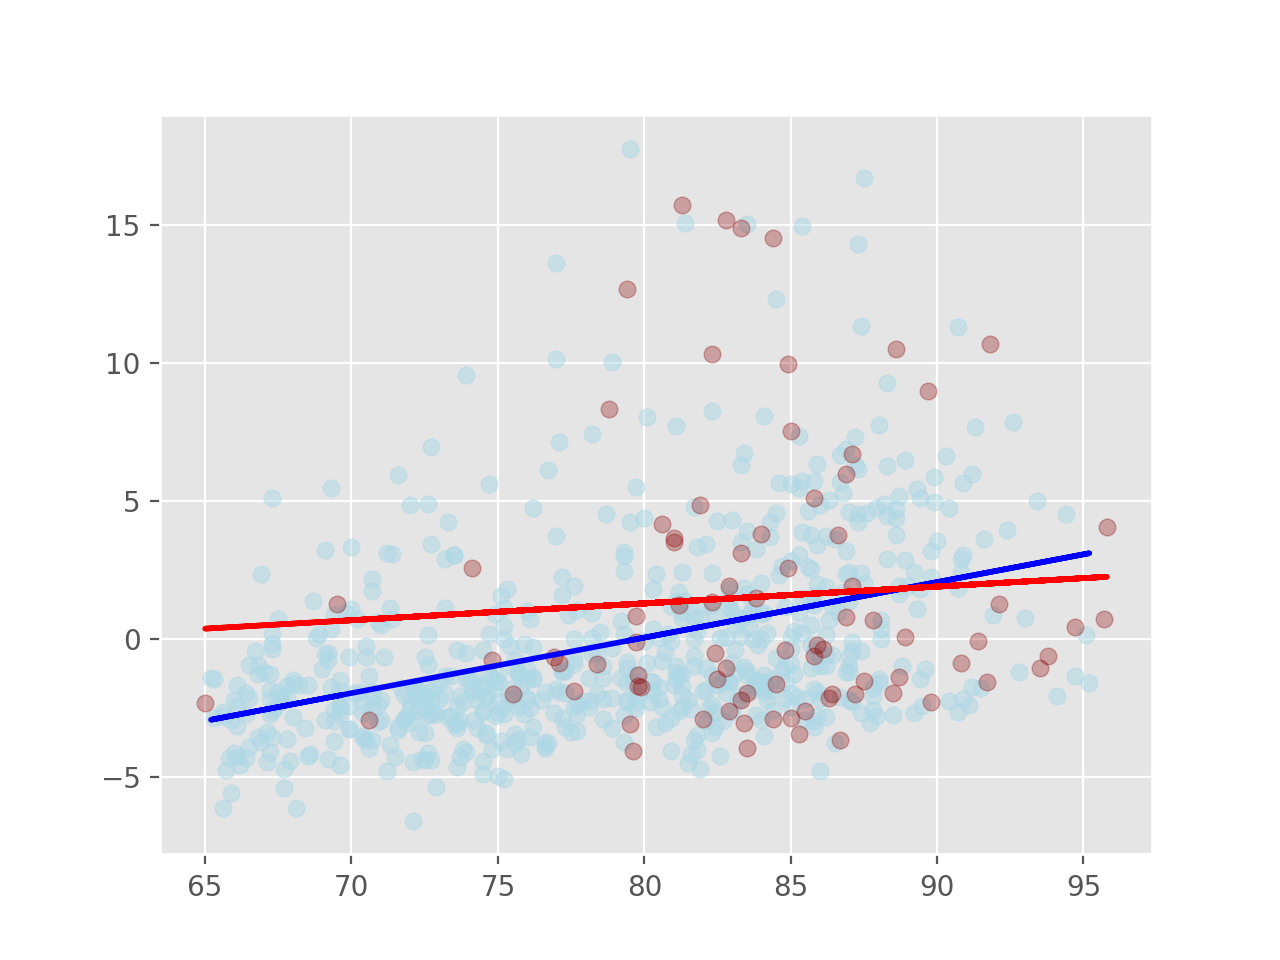

In [16]:
print("Bundle   :", all_pca_bundles_single[0][12])
print("Abs Diff :", round(all_pca_bundles_single[3][12],2))
all_pca_bundles_single[2][12]

In [38]:
# Save PCA Output
#out = pd.DataFrame(all_pca_bundles_single)
#out.to_csv('./data/out_pca_single.csv', index=False, header=False)